# Imports

In [1]:
from pathlib import Path
import sys
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#pd.__version__

# Set configuration

In [5]:
XSMALL_SIZE = 10
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=XSMALL_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=XSMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=XSMALL_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

pd.set_option('display.max_rows', None, 'display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)

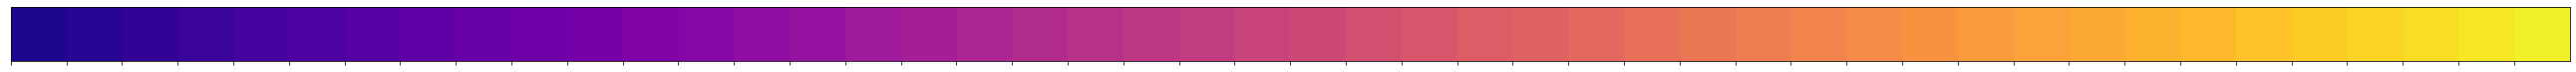

In [6]:
custom_states = sns.color_palette("plasma", 46) #as the number of states
sns.palplot(custom_states)

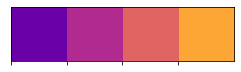

In [7]:
color_quarters = sns.color_palette("plasma", 4)
sns.palplot(color_quarters)

# Read datasets

## Preprocessing of US

BASTA non ne posso piu di processare

In [ ]:
'''
root_path = Path(os.getcwd())
start_path = str(root_path.parent.parent)
df_US = pd.read_csv(start_path + "/data/new_data/us.csv") #index_col=0

df_US = df_US.dropna(axis=1, how='all')
df_US = df_US[df_US["Domain Category"] == "NOT SPECIFIED"]
map_periods = {
    'FIRST OF JAN': "Q1",
    'JAN THRU MAR': "Q1",
    'FIRST OF APR': "Q2",
    'APR THRU JUN': "Q2",
    'FIRST OF JUL': "Q3",
    'JUL THRU SEP': "Q3",
    'FIRST OF OCT': "Q4",
    'OCT THRU DEC': "Q4"
}
df_US['Period'] = df_US['Period'].map(map_periods)
df_US = df_US[df_US.Period.isin(['Q1', 'Q2', 'Q3', 'Q4'])]
df_US = df_US.drop(columns = ["Program", "Geo Level", "State", "watershed_code", "Commodity", "Domain", "Domain Category"])
#df_US["Data Item"].unique()

#the values need to be processed since they are saved as strings with commas
df_US.Value = df_US.Value.apply(lambda x: float(x.replace(",","")))
df_US = pd.pivot_table(df_US, values = 'Value', index = ['Year', 'Period'], columns = ['Data Item'], sort=True)
df_US.drop(columns = df_US.columns[2], inplace=True)

df_US.columns = ['colony_added', 'colony_n', 'colony_lost', 'colony_lost_pct', 'Disesases', 'Other', 'Pesticides', 'Other.pests.parasites', 'Unknown', 'Varroa.mites', 'colony_reno', 'colony_reno_pct']
#reorder the columns:
new_cols = ['colony_n', 'colony_lost', 'colony_lost_pct', 'colony_added', 'colony_reno', 'colony_reno_pct', 'Varroa.mites', 'Disesases', 'Pesticides', 'Other.pests.parasites', 'Other', 'Unknown']
df_US = df_US[new_cols]

df_US = df_US.reset_index()
df_US.rename(columns={"Year": "year", "Period": "months"}, inplace=True)
df_US.to_csv(start_path + "/data/new_data/US_ziocane.csv", index=True)
'''

In [ ]:
'''
First Preprocessing which was not useful due to wrong data

df_US.months.unique()
map_quarters = {
    'January-March': "Q1",
    'April-June': "Q2",
    'July-September': "Q3",
    'October-December': "Q4"
}
df_US['months'] = df_US['months'].map(map_quarters)
df_US.drop(columns = df_US.columns[[0,1,4,6]], inplace=True)
df_US.to_csv(start_path + "/data/new_data/data_US.csv", index=True)

#After this further preprocessing, the data from "data_US" can be used straightforward
'''

# ----------------------------------------------------------------------------------------

In [41]:
root_path = Path(os.getcwd())
start_path = str(root_path.parent.parent)
df_US = pd.read_csv(start_path + "/data/new_data/US_ziocane.csv", index_col=0)
df_US.head()

year months   colony_n  colony_lost  colony_lost_pct  colony_added  \
0  2015     Q1  2824610.0     500020.0             18.0      546980.0   
1  2015     Q2  2849500.0     352860.0             12.0      661860.0   
2  2015     Q3  3132880.0     457100.0             15.0      172990.0   
3  2015     Q4  2874760.0     412380.0             14.0      117150.0   
4  2016     Q1  2619940.0     416100.0             16.0      571880.0   

   colony_reno  colony_reno_pct  Varroa.mites  Disesases  Pesticides  \
0     270530.0             10.0          25.2        3.1         7.4   
1     692850.0             24.0          43.4        4.9        16.6   
2     303070.0             10.0          41.2        8.0        15.2   
3     158790.0              6.0          37.0        5.2         9.5   
4     245060.0              9.0          34.6        6.2        10.9   

   Other.pests.parasites  Other  Unknown  
0                    8.6    6.9      4.3  
1                   19.5   11.6      3.5  
2                   17.6    8.8      4.8  
3                   11.4    7.3      6.9  
4                   12.6    6.9      5.4

In [42]:
df_US = df_US.groupby(["year", "months"]).sum()
df_US.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 29 entries, (2015, 'Q1') to (2022, 'Q2')
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   colony_n               29 non-null     float64
 1   colony_lost            29 non-null     float64
 2   colony_lost_pct        29 non-null     float64
 3   colony_added           29 non-null     float64
 4   colony_reno            29 non-null     float64
 5   colony_reno_pct        29 non-null     float64
 6   Varroa.mites           29 non-null     float64
 7   Disesases              29 non-null     float64
 8   Pesticides             29 non-null     float64
 9   Other.pests.parasites  29 non-null     float64
 10  Other                  29 non-null     float64
 11  Unknown                29 non-null     float64
dtypes: float64(12)
memory usage: 3.0+ KB


In [43]:
df = pd.read_csv(start_path + "/data/new_data/final_data_bystate.csv", index_col=0)
df.head()

year months       state   colony_n  colony_max  colony_lost  \
0  2015     Q1     alabama     7000.0      7000.0       1800.0   
1  2015     Q1     arizona    35000.0     35000.0       4600.0   
2  2015     Q1    arkansas    13000.0     14000.0       1500.0   
3  2015     Q1  california  1440000.0   1690000.0     255000.0   
4  2015     Q1    colorado     3500.0     12500.0       1500.0   

   colony_lost_pct  colony_added  colony_reno  colony_reno_pct  Varroa.mites  \
0               26          2800        250.0                4          10.0   
1               13          3400       2100.0                6          26.9   
2               11          1200         90.0                1          17.6   
3               15        250000     124000.0                7          24.7   
4               12           200        140.0                1          14.6   

   Other.pests.parasites  Disesases  Pesticides  Other  Unknown  
0                    5.4        0.0         2.2    9.1      9.4  
1                   20.5        0.1         0.0    1.8      3.1  
2                   11.4        1.5         3.4    1.0      1.0  
3                    7.2        3.0         7.5    6.5      2.8  
4                    0.9        1.8         0.6    2.6      5.9

In [44]:
df.loc[np.logical_and(df["year"]==2015, df["months"]=="Q1"),"Unknown"].mean()

5.004347826086956

**Problem**: Why does the mean of the stressors in a trimester over all the states does not equal to the value of the stressor for the trimester in US?

In [45]:
'''
#preprocessing to perform after the preprocessing done to "data_bees.csv" in "main.Rmd"
#--> which led to "cleaned_by_state.csv"

map_quarters2 = {
    'JAN THRU MAR': "Q1",
    'APR THRU JUN': "Q2",
    'JUL THRU SEP': "Q3",
    'OCT THRU DEC': "Q4"
}
df['Period'] = df['Period'].map(map_quarters2)
df.State = df.State.apply(lambda x: x.lower())
df.rename(columns = {"Year": "year", "Period": "months", "State": "state"}, inplace=True)
df = df.set_index(['year', 'months', 'state'])
df.sort_index(inplace=True)
#df_US.columns
df.drop(df.columns[[0, 3]], axis=1, inplace=True)
df.columns = ['colony_added', 'colony_max', 'colony_lost', 'colony_lost_pct', 'Disesases', 'Other', 'Pesticides', 'Other.pests.parasites', 'Unknown', 'Varroa.mites', 'colony_reno', 'colony_reno_pct', 'colony_n']
cols = df_US.columns.tolist()
cols.insert(1, "colony_max")
print(cols)
df = df[cols] #reorder the columns of df to match the ones of df_US + colony_max
df = df.reset_index()
df.to_csv(start_path + "/data/new_data/final_data_bystate.csv", index=True)
'''

'\n#preprocessing to perform after the preprocessing done to "data_bees.csv" in "main.Rmd"\n#--> which led to "cleaned_by_state.csv"\n\nmap_quarters2 = {\n    \'JAN THRU MAR\': "Q1",\n    \'APR THRU JUN\': "Q2",\n    \'JUL THRU SEP\': "Q3",\n    \'OCT THRU DEC\': "Q4"\n}\ndf[\'Period\'] = df[\'Period\'].map(map_quarters2)\ndf.State = df.State.apply(lambda x: x.lower())\ndf.rename(columns = {"Year": "year", "Period": "months", "State": "state"}, inplace=True)\ndf = df.set_index([\'year\', \'months\', \'state\'])\ndf.sort_index(inplace=True)\n#df_US.columns\ndf.drop(df.columns[[0, 3]], axis=1, inplace=True)\ndf.columns = [\'colony_added\', \'colony_max\', \'colony_lost\', \'colony_lost_pct\', \'Disesases\', \'Other\', \'Pesticides\', \'Other.pests.parasites\', \'Unknown\', \'Varroa.mites\', \'colony_reno\', \'colony_reno_pct\', \'colony_n\']\ncols = df_US.columns.tolist()\ncols.insert(1, "colony_max")\nprint(cols)\ndf = df[cols] #reorder the columns of df to match the ones of df_US + col

In [46]:
df_years = df.set_index(["year", "months", "state"])
df_years.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1334 entries, (2015, 'Q1', 'alabama') to (2022, 'Q2', 'wyoming')
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   colony_n               1334 non-null   float64
 1   colony_max             1334 non-null   float64
 2   colony_lost            1334 non-null   float64
 3   colony_lost_pct        1334 non-null   int64  
 4   colony_added           1334 non-null   int64  
 5   colony_reno            1334 non-null   float64
 6   colony_reno_pct        1334 non-null   int64  
 7   Varroa.mites           1334 non-null   float64
 8   Other.pests.parasites  1334 non-null   float64
 9   Disesases              1334 non-null   float64
 10  Pesticides             1334 non-null   float64
 11  Other                  1334 non-null   float64
 12  Unknown                1334 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 141.5+ KB


## Features Interpretation

**Reference**: <br>
The questionnaire can be viewed here: https://www.nass.usda.gov/Publications/Methodology_and_Data_Quality/Honey_Bee_Colonies/08_2022/July%202022%20QCL.pdf <br>
That is a link to the questionnaire for the July quarter. Similar questionnaires are used in October and then the following January and April, with the only difference being the year and month used in the questions.
 
Max colonies is calculated in the summary. While some colonies in the U.S. are primarily honey producing colonies and usually remain in one state, other colonies are primarily used for pollination purposes. Pollinating colonies are moved from state to state throughout the year following the crops that need to be pollinated. Therefore, the maximum number of colonies in a state can vary widely during a quarter and throughout the year. For example, on an individual record level an operation could not have any colonies in North Dakota at the beginning of a quarter because all of their colonies are in California for almond pollination. But during the middle of the quarter the almond pollination season ends and the colonies are moved back to North Dakota. So while the January 1 colony number might be zero, the max colony number during the January – March quarter could be 1,000.
 
The record level data is processed in a summary which also deals with non-response through a weighting procedure and the state level indications are created.
 
Colonies renovated are not included in the calculation for the next quarter’s starting inventory.
 
As you can see on the questionnaire linked above, beginning and ending inventory is asked on the survey. Ending inventory is generally considered one of the stronger indications due to memory bias of remembering facts from three months ago and what happened during those three months.
 
At the state level the calculation is as follows: Max colonies – Lost Colonies + Added Colonies  = Beginning Inventory of next quarter, assuming no colonies were moved out of state. However, because colonies can move out of state before the start of the next quarter, it means that the starting inventory can be much lower. If no colonies are moved out of state, then the calculation above should be within 2% of the starting inventory of the following quarter. At the national level, the maximum colony value is not calculated as colonies are not sent across borders for pollinating. Therefore the calculation is First of the Quarter Inventory – Lost + Added = (+/-1%) Beginning Inventory.

# Analysis of US data

In [29]:
# df_US.index --> "2019-Q2" missing because of missing data

MultiIndex([(2015, 'Q1'),
            (2015, 'Q2'),
            (2015, 'Q3'),
            (2015, 'Q4'),
            (2016, 'Q1'),
            (2016, 'Q2'),
            (2016, 'Q3'),
            (2016, 'Q4'),
            (2017, 'Q1'),
            (2017, 'Q2'),
            (2017, 'Q3'),
            (2017, 'Q4'),
            (2018, 'Q1'),
            (2018, 'Q2'),
            (2018, 'Q3'),
            (2018, 'Q4'),
            (2019, 'Q1'),
            (2019, 'Q3'),
            (2019, 'Q4'),
            (2020, 'Q1'),
            (2020, 'Q2'),
            (2020, 'Q3'),
            (2020, 'Q4'),
            (2021, 'Q1'),
            (2021, 'Q2'),
            (2021, 'Q3'),
            (2021, 'Q4'),
            (2022, 'Q1'),
            (2022, 'Q2')],
           names=['year', 'months'])

In [19]:
df_US[df_US.colony_lost < df_US.colony_added]

colony_n  colony_lost  colony_lost_pct  colony_added  \
year months                                                          
2015 Q1      2824610.0     500020.0             18.0      546980.0   
     Q2      2849500.0     352860.0             12.0      661860.0   
2016 Q1      2619940.0     416100.0             16.0      571880.0   
     Q2      2801470.0     329820.0             12.0      736920.0   
2017 Q1      2641090.0     398650.0             15.0      478240.0   
     Q2      2694150.0     285590.0             11.0      613360.0   
2018 Q1      2635220.0     438030.0             17.0      511320.0   
     Q2      2665880.0     355270.0             13.0      676360.0   
2020 Q1      2876100.0     415110.0             14.0      511160.0   
     Q2      2972000.0     300990.0             10.0      536170.0   
2021 Q2      2829520.0     352280.0             12.0      665730.0   
2022 Q1      2875770.0     331780.0             12.0      367890.0   
     Q2      2921590.0     282630.0             10.0      589630.0   

             colony_reno  colony_reno_pct  Varroa.mites  Disesases  \
year months                                                          
2015 Q1         270530.0             10.0          25.2        3.1   
     Q2         692850.0             24.0          43.4        4.9   
2016 Q1         245060.0              9.0          34.6        6.2   
     Q2         561160.0             20.0          53.4        9.5   
2017 Q1         241210.0              9.0          42.2        7.0   
     Q2         762550.0             28.0          40.9        4.6   
2018 Q1         289200.0             11.0          40.7        4.3   
     Q2         740350.0             28.0          56.4       11.6   
2020 Q1         153390.0              5.0          25.5        4.4   
     Q2         626870.0             21.0          43.1        5.5   
2021 Q2         475750.0             17.0          50.7        5.2   
2022 Q1         187180.0              7.0          33.7        2.5   
     Q2         492410.0             17.0          45.2        3.9   

             Pesticides  Other.pests.parasites  Other  Unknown  
year months                                                     
2015 Q1             7.4                    8.6    6.9      4.3  
     Q2            16.6                   19.5   11.6      3.5  
2016 Q1            10.9                   12.6    6.9      5.4  
     Q2            12.4                   16.3   12.3      4.1  
2017 Q1             8.9                   15.5    7.2      7.4  
     Q2            12.3                   10.9    7.0      4.9  
2018 Q1            10.3                   12.7    8.7      7.1  
     Q2            13.3                   19.4   14.7      9.3  
2020 Q1             5.0                    8.0    5.6      5.4  
     Q2             6.2                   12.5   11.2      5.4  
2021 Q2            12.4                   12.8   10.0      3.9  
2022 Q1             5.8                    8.4    4.5      4.2  
     Q2             6.7                   21.2   15.1      3.5

**Conclusion**: <br>
The values of colony added is bigger than colony lost in almost every Q1 and Q2, and never in Q3 and Q4, so the most of the colonies are added in the first half of the year.

In [135]:
df_US[df_US.colony_reno > df_US.colony_lost]

colony_n  colony_lost  colony_lost_pct  colony_added  \
year months                                                          
2015 Q2      2849500.0     352860.0             12.0      661860.0   
2016 Q2      2801470.0     329820.0             12.0      736920.0   
2017 Q2      2694150.0     285590.0             11.0      613360.0   
     Q3      2994500.0     394810.0             13.0      284370.0   
2018 Q2      2665880.0     355270.0             13.0      676360.0   
     Q3      2958790.0     377120.0             13.0      263560.0   
2020 Q2      2972000.0     300990.0             10.0      536170.0   
2021 Q2      2829520.0     352280.0             12.0      665730.0   
2022 Q2      2921590.0     282630.0             10.0      589630.0   

             colony_reno  colony_reno_pct  Varroa.mites  Disesases  \
year months                                                          
2015 Q2         692850.0             24.0          43.4        4.9   
2016 Q2         561160.0             20.0          53.4        9.5   
2017 Q2         762550.0             28.0          40.9        4.6   
     Q3         449550.0             15.0          45.5        4.8   
2018 Q2         740350.0             28.0          56.4       11.6   
     Q3         420780.0             14.0          53.8        6.4   
2020 Q2         626870.0             21.0          43.1        5.5   
2021 Q2         475750.0             17.0          50.7        5.2   
2022 Q2         492410.0             17.0          45.2        3.9   

             Pesticides  Other.pests.parasites  Other  Unknown  
year months                                                     
2015 Q2            16.6                   19.5   11.6      3.5  
2016 Q2            12.4                   16.3   12.3      4.1  
2017 Q2            12.3                   10.9    7.0      4.9  
     Q3            10.9                   15.0   11.6      4.9  
2018 Q2            13.3                   19.4   14.7      9.3  
     Q3            15.7                   15.2   13.9      4.7  
2020 Q2             6.2                   12.5   11.2      5.4  
2021 Q2            12.4                   12.8   10.0      3.9  
2022 Q2             6.7                   21.2   15.1      3.5

**Conclusion**: <br>
Colonies renovated are not included in colonies lost since there are some trimesters where the first value is higher than the latter. <br>
In particular, the quarter when this happens is almost always the Q2.

In [136]:
print("sum of colony lost along the years: ", df_US.colony_lost.sum())
print("sum of colony added along the years: ", df_US.colony_added.sum())

sum of colony lost along the years:  11397500.0
sum of colony added along the years:  11131330.0


**Conclusion**: <br>
Over the years of the analysis, the number of colonies lost is more than the added ones, so we expect an increase of colonies from 2015 to 2022.

In [137]:
df_US.loc[(2022, "Q2"), "colony_n"] < df_US.loc[(2015, "Q1"), "colony_n"]

False

<AxesSubplot:title={'center':'Number of colonies lost, added and renovated along time in US'}, xlabel='year,months', ylabel='Number of colonies'>

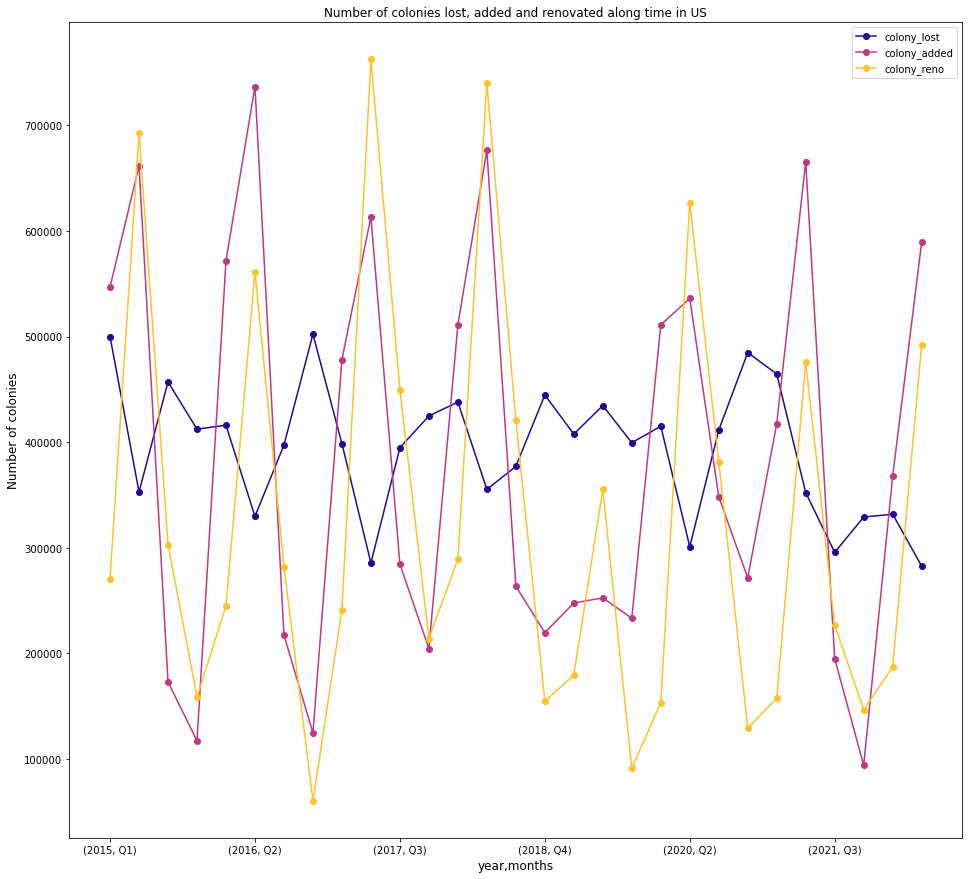

In [138]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Number of colonies lost, added and renovated along time in US')
plt.ylabel('Number of colonies')
df_US[["colony_lost", "colony_added", "colony_reno"]].plot(ax=ax, marker="o", color=[custom_states[i] for i in [1,20,40]])

In [139]:
df_US_new = df_US.copy()
df_US_new["colony_end"] = df_US_new["colony_n"].shift(-1)
df_US_new["colony_end_computed"] = df_US_new["colony_n"] + df_US_new["colony_added"] - df_US_new["colony_lost"]
df_US_new["diff"] = df_US_new["colony_end_computed"]-df_US_new["colony_end"]
df_US_new["diff_pct"] = df_US_new["diff"]*100/df_US_new["colony_end"]
df_US_new.loc[(2019,"Q1"), ["diff", "diff_pct"]] = [0,0]
df_US_new

colony_n  colony_lost  colony_lost_pct  colony_added  \
year months                                                          
2015 Q1      2824610.0     500020.0             18.0      546980.0   
     Q2      2849500.0     352860.0             12.0      661860.0   
     Q3      3132880.0     457100.0             15.0      172990.0   
     Q4      2874760.0     412380.0             14.0      117150.0   
2016 Q1      2619940.0     416100.0             16.0      571880.0   
     Q2      2801470.0     329820.0             12.0      736920.0   
     Q3      3181180.0     397290.0             12.0      217320.0   
     Q4      3032060.0     502350.0             17.0      124660.0   
2017 Q1      2641090.0     398650.0             15.0      478240.0   
     Q2      2694150.0     285590.0             11.0      613360.0   
     Q3      2994500.0     394810.0             13.0      284370.0   
     Q4      2849770.0     424860.0             15.0      204510.0   
2018 Q1      2635220.0     438030.0             17.0      511320.0   
     Q2      2665880.0     355270.0             13.0      676360.0   
     Q3      2958790.0     377120.0             13.0      263560.0   
     Q4      2868970.0     444730.0             16.0      219640.0   
2019 Q1      2671470.0     407700.0             15.0      247710.0   
     Q3      3175960.0     434700.0             14.0      252550.0   
     Q4      3018110.0     399510.0             13.0      233260.0   
2020 Q1      2876100.0     415110.0             14.0      511160.0   
     Q2      2972000.0     300990.0             10.0      536170.0   
     Q3      3175330.0     411490.0             13.0      348280.0   
     Q4      3135340.0     484920.0             15.0      271500.0   
2021 Q1      2903240.0     464640.0             16.0      417490.0   
     Q2      2829520.0     352280.0             12.0      665730.0   
     Q3      3173390.0     295660.0              9.0      194900.0   
     Q4      3091790.0     329110.0             11.0       93940.0   
2022 Q1      2875770.0     331780.0             12.0      367890.0   
     Q2      2921590.0     282630.0             10.0      589630.0   

             colony_reno  colony_reno_pct  Varroa.mites  Disesases  \
year months                                                          
2015 Q1         270530.0             10.0          25.2        3.1   
     Q2         692850.0             24.0          43.4        4.9   
     Q3         303070.0             10.0          41.2        8.0   
     Q4         158790.0              6.0          37.0        5.2   
2016 Q1         245060.0              9.0          34.6        6.2   
     Q2         561160.0             20.0          53.4        9.5   
     Q3         282130.0              9.0          46.1        6.7   
     Q4          60390.0              2.0          46.6        8.3   
2017 Q1         241210.0              9.0          42.2        7.0   
     Q2         762550.0             28.0          40.9        4.6   
     Q3         449550.0             15.0          45.5        4.8   
     Q4         213990.0              8.0          55.3        9.4   
2018 Q1         289200.0             11.0          40.7        4.3   
     Q2         740350.0             28.0          56.4       11.6   
     Q3         420780.0             14.0          53.8        6.4   
     Q4         154560.0              5.0          50.5       10.4   
2019 Q1         179500.0              7.0          45.6        7.1   
     Q3         355330.0             11.0          44.1        8.5   
     Q4          91000.0              3.0          45.7        5.4   
2020 Q1         153390.0              5.0          25.5        4.4   
     Q2         626870.0             21.0          43.1        5.5   
     Q3         381620.0             12.0          55.7        6.1   
     Q4         128990.0              4.0          48.6        6.8   
2021 Q1         157600.0              5.0          33.0        2.3   
     Q2         475750.

<AxesSubplot:title={'center':'Number of differences in colonies along time in US for each quarter'}, xlabel='year', ylabel='Differences in colonies'>

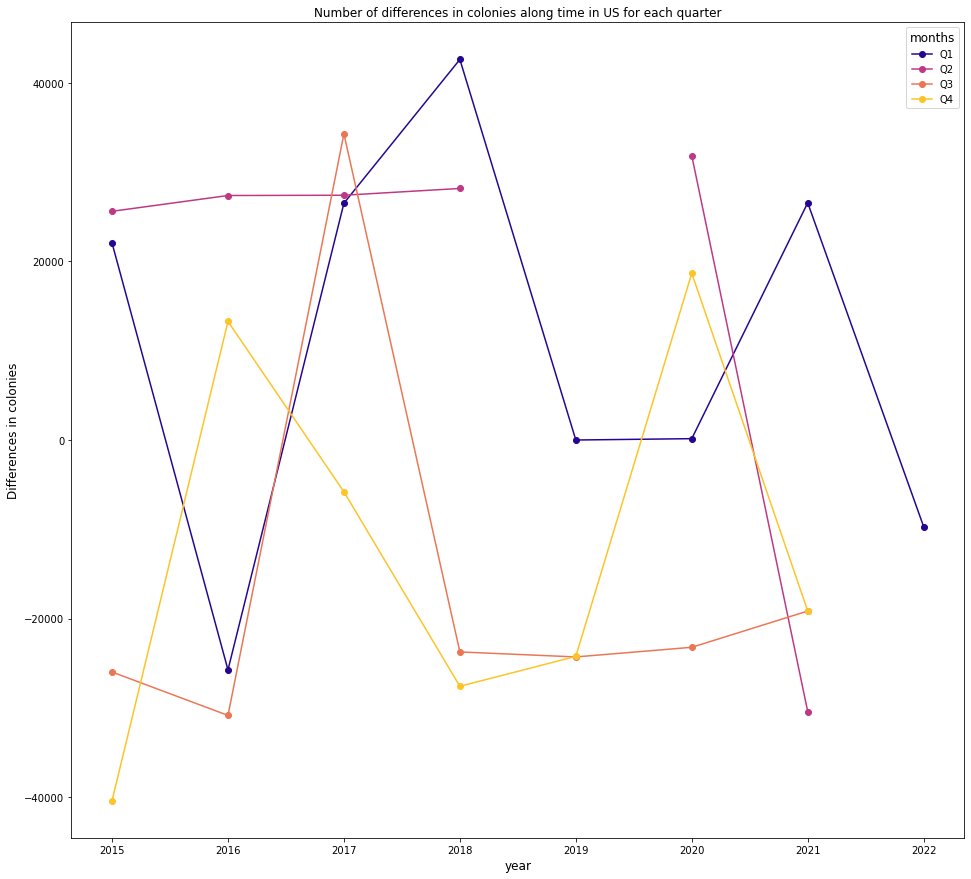

In [140]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Number of differences in colonies along time in US for each quarter')
plt.ylabel('Differences in colonies')
df_US_new["diff"].unstack().plot(ax=ax, marker="o", color=[custom_states[i] for i in [1,20,30,40]])

<AxesSubplot:title={'center':'Stressors along time in US for each quarter'}, xlabel='year,months', ylabel='Stressors percentage'>

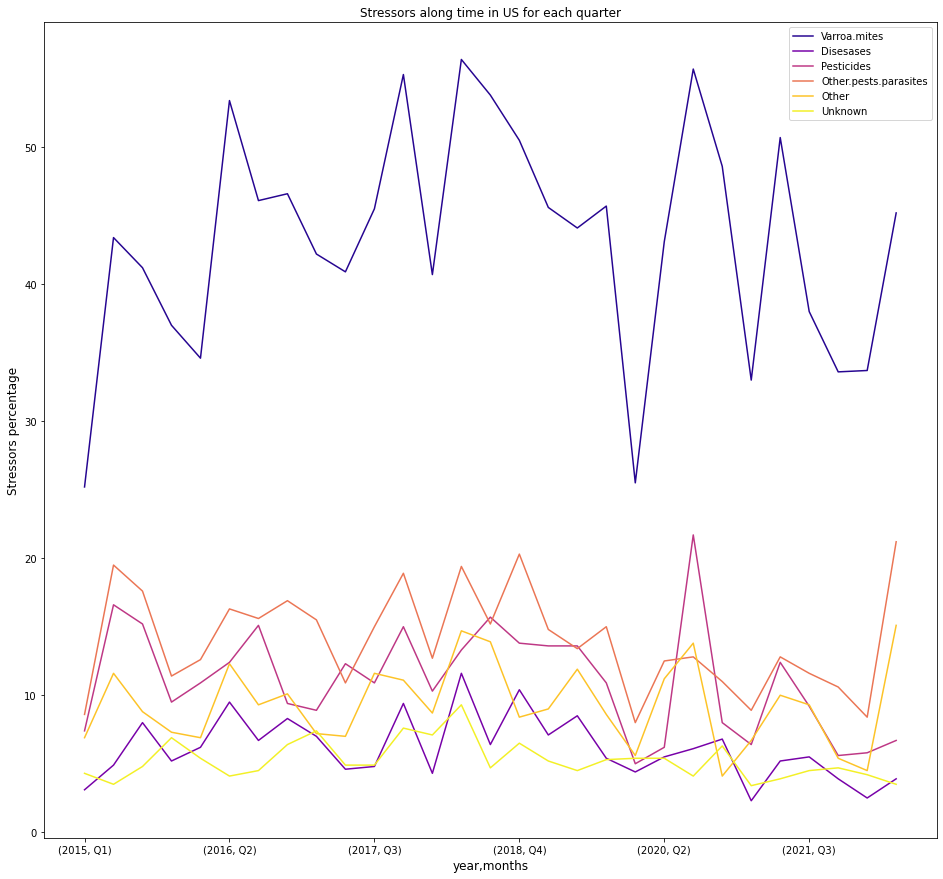

In [23]:
df_US_stressors = df_US[["Varroa.mites", "Disesases", "Pesticides", "Other.pests.parasites", "Other", "Unknown"]]
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Stressors along time in US for each quarter')
plt.ylabel('Stressors percentage')
df_US_stressors.plot(ax=ax, color=[custom_states[i] for i in [1,10,20,30,40,45]])

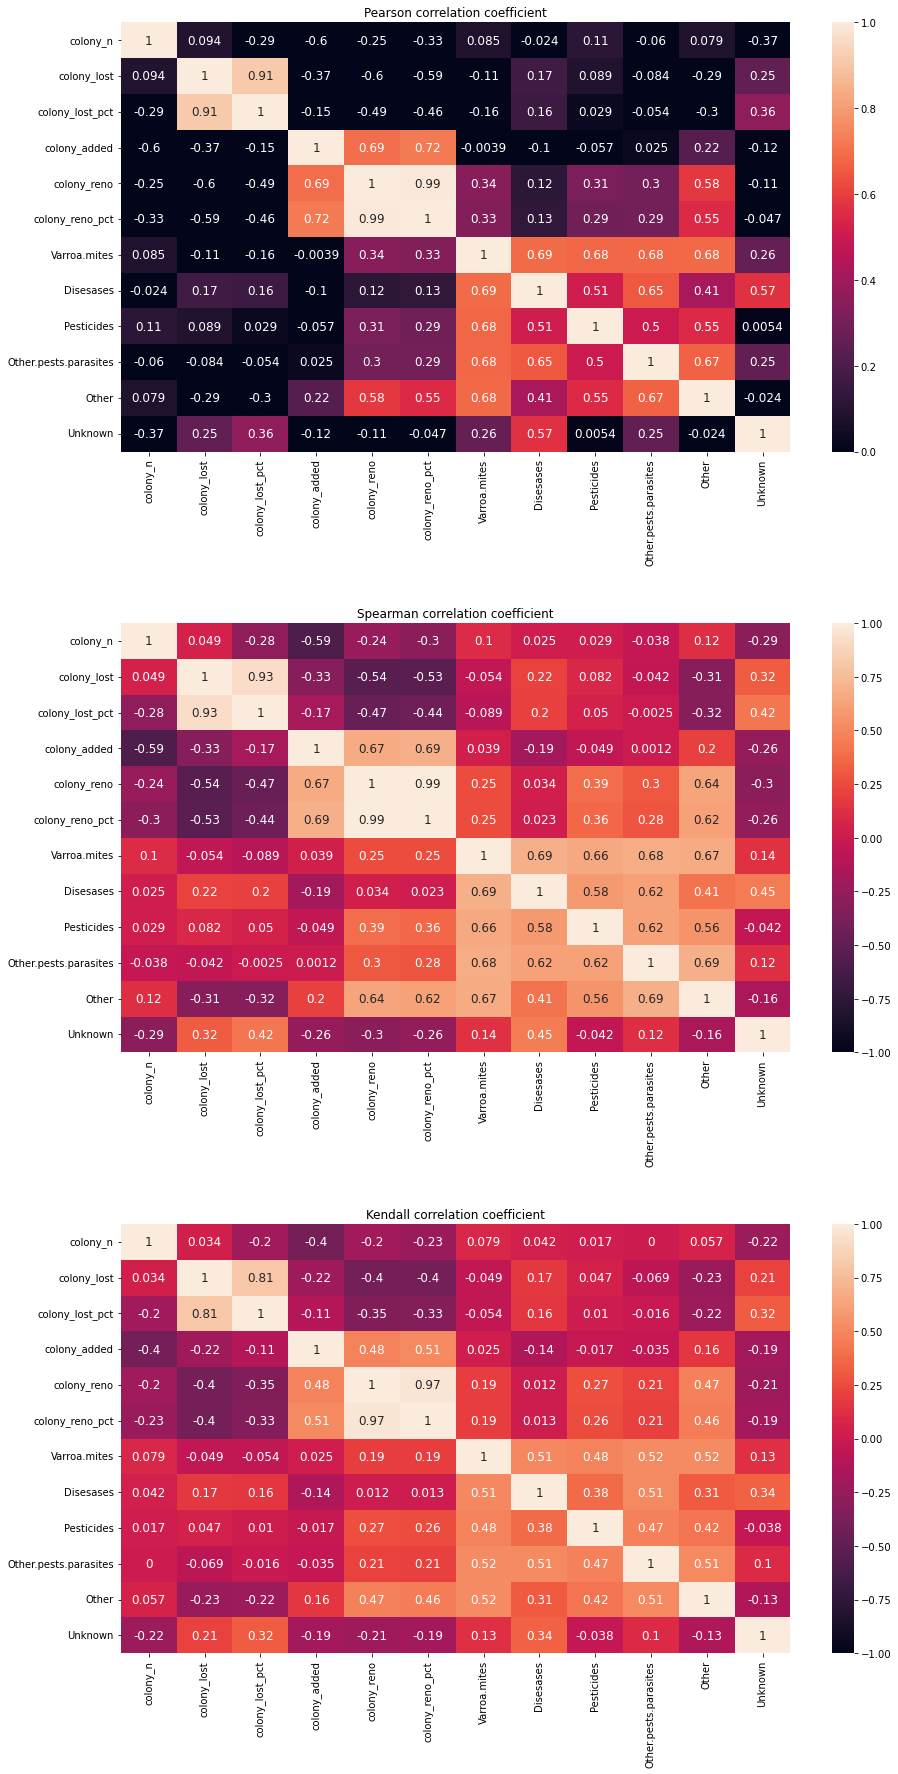

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(15, 30))
plt.subplots_adjust(hspace=0.4)
sns.heatmap(df_US.corr(), annot=True, vmin=0, vmax=1, ax=ax[0])
ax[0].set_title('Pearson correlation coefficient')
sns.heatmap(df_US.corr(method="spearman"), annot=True, vmin=-1, vmax=1, ax=ax[1])
ax[1].set_title("Spearman correlation coefficient")
sns.heatmap(df_US.corr(method="kendall"), annot=True, vmin=-1, vmax=1, ax=ax[2])
ax[2].set_title('Kendall correlation coefficient')
plt.show()

Text(0.5, 0.98, 'Percentage of colony loss in US')

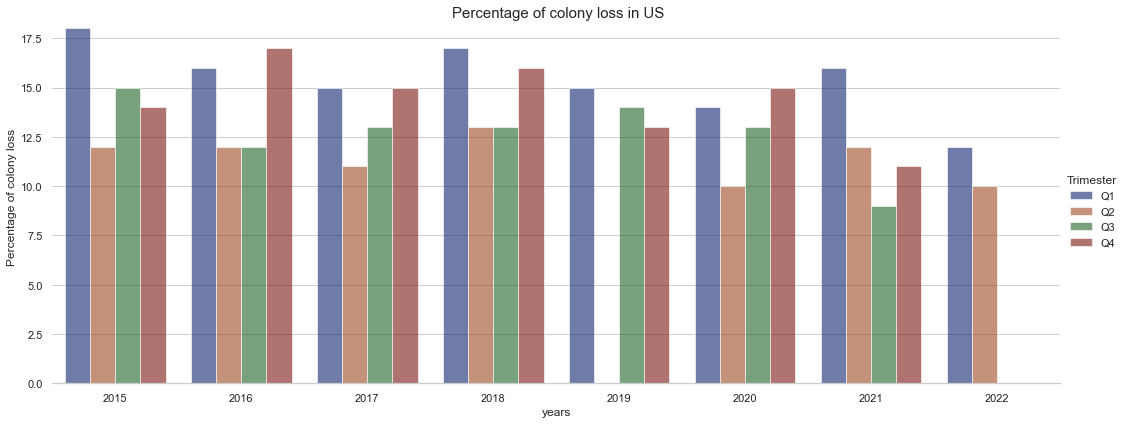

In [71]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_US.reset_index(), kind="bar",
    x="year", y="colony_lost_pct", hue="months", palette="dark", alpha=.6, height=6, aspect=2.5
) #palette=["k", "b"]
g.despine(left=True)
g.set_axis_labels("years", "Percentage of colony loss")
g.legend.set_title("Trimester")
g.fig.suptitle("Percentage of colony loss in US")

## Missing values (not needed now)

<AxesSubplot:ylabel='year-months-state'>

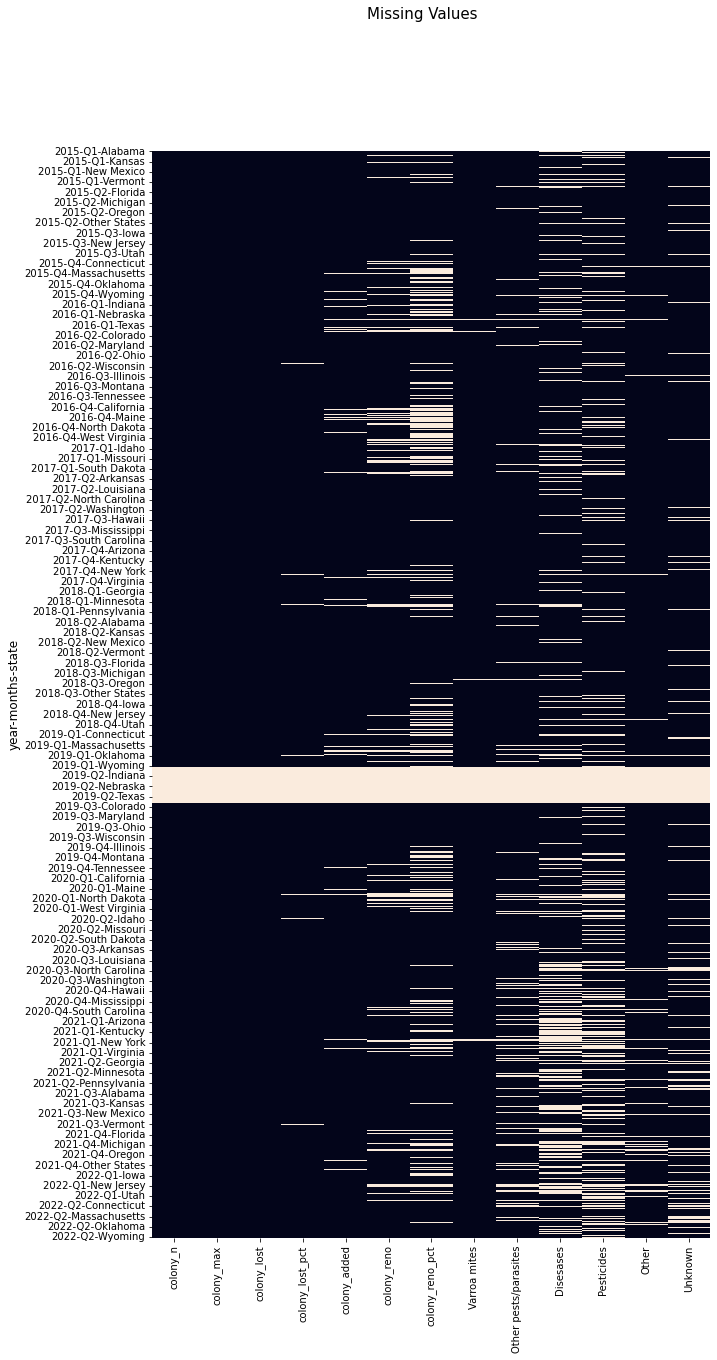

In [22]:
fig, (ax) = plt.subplots(figsize=(10,20))
fig.suptitle('Missing Values')
sns.heatmap(df_years.isnull(), cbar=False, ax=ax)

In [23]:
'''
df_years.dropna(axis=0, how="all", inplace=True)
#df.iloc[:,3:] = df.iloc[:,3:].dropna(axis=0, how="all")
df = df.dropna(axis = 0, thresh = 4)
#df.iloc[790:820,3:].isnull().values.any()

df_years[["colony_added", "colony_reno"]] = df_years[["colony_added", "colony_reno"]].fillna(value = 0, inplace=False)
df[["colony_added", "colony_reno"]] = df[["colony_added", "colony_reno"]].fillna(value = 0, inplace=False)

'''

# Data Exploration

<AxesSubplot:title={'center':'Number of colonies along time for each state'}, xlabel='year,months', ylabel='Number of colonies'>

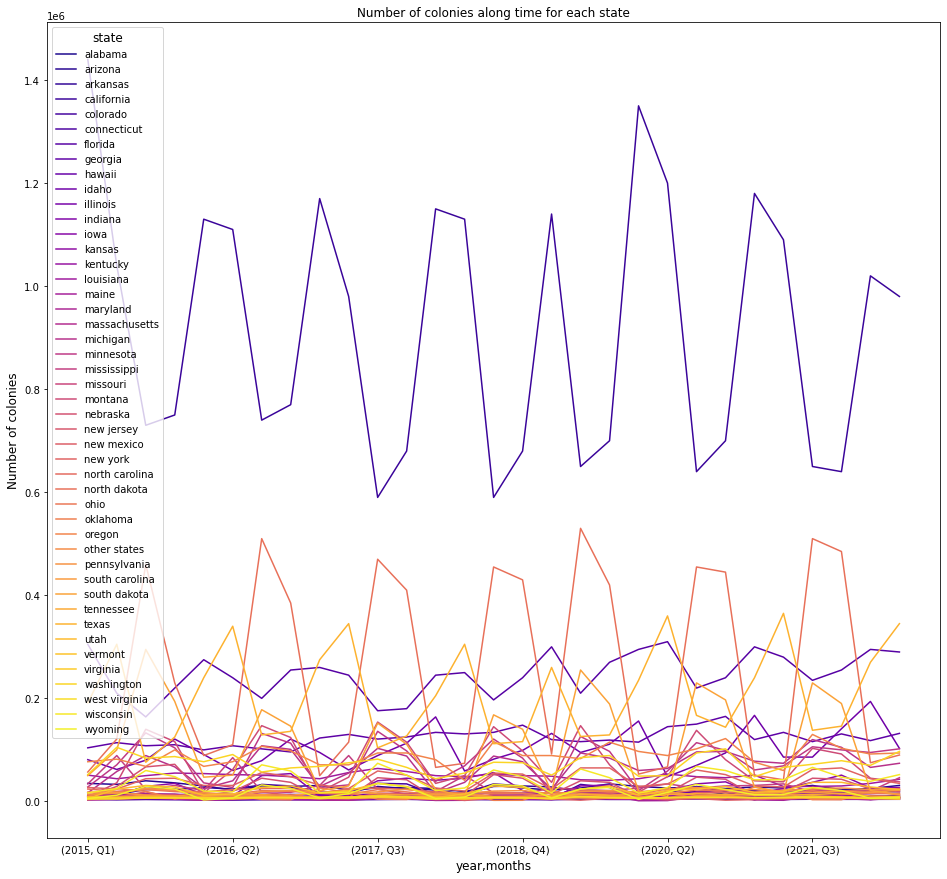

In [47]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Number of colonies along time for each state')
plt.ylabel('Number of colonies')
df_years["colony_n"].unstack().plot(ax=ax,color=custom_states)

#The state with the highest number of colonies is California

In [48]:
df["season"] = df["months"].apply(lambda x: "Winter" if x == "Q1" or x == "Q4" else "Summer")
#in this case, I considered Q4 2015 as Winter 2015, while it should be Winter 2016 together with Q1 2016
df["year_revisited"] = df.apply(lambda row: row.year + 1 if row.months == "Q4" else row.year, axis=1)
df.head(200)

year months           state   colony_n  colony_max  colony_lost  \
0    2015     Q1         alabama     7000.0      7000.0       1800.0   
1    2015     Q1         arizona    35000.0     35000.0       4600.0   
2    2015     Q1        arkansas    13000.0     14000.0       1500.0   
3    2015     Q1      california  1440000.0   1690000.0     255000.0   
4    2015     Q1        colorado     3500.0     12500.0       1500.0   
5    2015     Q1     connecticut     3900.0      3900.0        870.0   
6    2015     Q1         florida   305000.0    315000.0      42000.0   
7    2015     Q1         georgia   104000.0    105000.0      14500.0   
8    2015     Q1          hawaii    10500.0     10500.0        380.0   
9    2015     Q1           idaho    81000.0     88000.0       3700.0   
10   2015     Q1        illinois     6000.0     10500.0       4200.0   
11   2015     Q1         indiana     9000.0      9500.0       2100.0   
12   2015     Q1            iowa    12500.0     17500.0       3100.0   
13   2015     Q1          kansas     4600.0      7000.0       1600.0   
14   2015     Q1        kentucky     7500.0     10500.0       4100.0   
15   2015     Q1       louisiana    51000.0     51000.0       8000.0   
16   2015     Q1           maine     3100.0      6500.0        380.0   
17   2015     Q1        maryland     7500.0     10000.0       4100.0   
18   2015     Q1   massachusetts     2900.0      4600.0       1000.0   
19   2015     Q1        michigan    16500.0     60000.0      11500.0   
20   2015     Q1       minnesota    28000.0     74000.0       3700.0   
21   2015     Q1     mississippi    34000.0     76000.0       8500.0   
22   2015     Q1        missouri    12000.0     13000.0       2000.0   
23   2015     Q1         montana     8500.0     36000.0       2200.0   
24   2015     Q1        nebraska    10000.0     31000.0       2600.0   
25   2015     Q1      new jersey     6000.0      9000.0       1100.0   
26   2015     Q1      new mexico     7000.0      7000.0        690.0   
27   2015     Q1        new york    27000.0     30000.0       6500.0   
28   2015     Q1  north carolina    24000.0     26000.0       7000.0   
29   2015     Q1    north dakota    57000.0    120000.0        620.0   
30   2015     Q1            ohio    18000.0     22000.0      10500.0   
31   2015     Q1        oklahoma     9500.0     26000.0       6000.0   
32   2015     Q1          oregon    77000.0     87000.0       6500.0   
33   2015     Q1    other states     3410.0      8990.0       2080.0   
34   2015     Q1    pennsylvania    14000.0     21000.0       6500.0   
35   2015     Q1  south carolina    17000.0     17500.0       2700.0   
36   2015     Q1    south dakota    50000.0     97000.0       4600.0   
37   2015     Q1       tennessee     9500.0      9500.0       2000.0   
38   2015     Q1           texas   191000.0    250000.0      26000.0   
39   2015     Q1            utah     6000.0     24000.0       3300.0   
40   2015     Q1         vermont     5500.0      5500.0        700.0   
41   2015     Q1        virginia     8000.0      9000.0       2500.0   
42   2015     Q1      washington    52000.0    105000.0      14000.0   
43   2015     Q1   west virginia     4700.0      6000.0       1800.0   
44   2015     Q1       wisconsin    16500.0     29000.0       8000.0   
45   2015     Q1         wyoming     5500.0     12000.0       2000.0   
46   2015     Q2         alabama     7500.0      7500.0        860.0   
47   2015     Q2         arizona    33000.0     33000.0       5500.0   
48   2015     Q2        arkansas    13500.0     13500.0       1900.0   
49   2015     Q2      california  1040000.0   1050000.0     104000.0   
50   2015     Q2        colorado    12000.0     25000.0       1900.0   
51   2015     Q2     connecticut     3000.0      3000.0         80.0   
52   2015     Q2         florida   210000.0    215000.0      35000.0   
53   2015     Q2         georgia   114000.0    124000.0      23000.0   
54   2015     Q2          hawaii    13500.0  

In [49]:
cols_temp = ["year_revisited", "season", "state", "colony_lost_pct"]
df_temp = df.loc[:,cols_temp]
df_temp = df_temp.groupby(["year_revisited", "season"]).mean()
display(df_temp)

'''
cols_temp = ["year", "season", "state", "colony_lost_pct"]
df_temp2 = df.loc[:,cols_temp]
df_temp2 = df_temp2.groupby(["year", "season"]).mean()
df_temp2
'''

colony_lost_pct
year_revisited season                 
2015           Summer        10.086957
               Winter        17.913043
2016           Summer         9.847826
               Winter        12.010870
2017           Summer         9.695652
               Winter        13.032609
2018           Summer         9.891304
               Winter        14.217391
2019           Summer        10.978261
               Winter        12.967391
2020           Summer        10.021739
               Winter        11.576087
2021           Summer         8.630435
               Winter        11.641304
2022           Summer         7.804348
               Winter        10.565217

'\ncols_temp = ["year", "season", "state", "colony_lost_pct"]\ndf_temp2 = df.loc[:,cols_temp]\ndf_temp2 = df_temp2.groupby(["year", "season"]).mean()\ndf_temp2\n'

'\n#create your own color array\nmy_colors = ["#9b59b6", "#3498db", \n             "#2ecc71", "#006a4e"]\n  \n# add color array to set_palette\n# function of seaborn\nsns.set_palette(my_colors)\n'

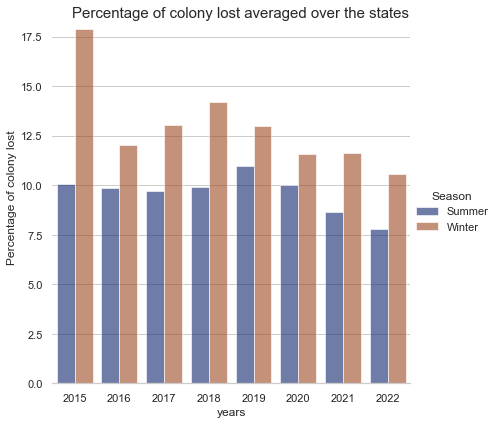

In [52]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_temp.reset_index(), kind="bar",
    x="year_revisited", y="colony_lost_pct", hue="season", palette="dark", alpha=.6, height=6
) #palette=["k", "b"]
g.despine(left=True)
g.set_axis_labels("years", "Percentage of colony lost")
g.legend.set_title("Season")
g.fig.suptitle("Percentage of colony lost averaged over the states")

'''
#create your own color array
my_colors = ["#9b59b6", "#3498db", 
             "#2ecc71", "#006a4e"]
  
# add color array to set_palette
# function of seaborn
sns.set_palette(my_colors)
'''

In [53]:
df.head()

year months       state   colony_n  colony_max  colony_lost  \
0  2015     Q1     alabama     7000.0      7000.0       1800.0   
1  2015     Q1     arizona    35000.0     35000.0       4600.0   
2  2015     Q1    arkansas    13000.0     14000.0       1500.0   
3  2015     Q1  california  1440000.0   1690000.0     255000.0   
4  2015     Q1    colorado     3500.0     12500.0       1500.0   

   colony_lost_pct  colony_added  colony_reno  colony_reno_pct  Varroa.mites  \
0               26          2800        250.0                4          10.0   
1               13          3400       2100.0                6          26.9   
2               11          1200         90.0                1          17.6   
3               15        250000     124000.0                7          24.7   
4               12           200        140.0                1          14.6   

   Other.pests.parasites  Disesases  Pesticides  Other  Unknown  season  \
0                    5.4        0.0         2.2    9.1      9.4  Winter   
1                   20.5        0.1         0.0    1.8      3.1  Winter   
2                   11.4        1.5         3.4    1.0      1.0  Winter   
3                    7.2        3.0         7.5    6.5      2.8  Winter   
4                    0.9        1.8         0.6    2.6      5.9  Winter   

   year_revisited  
0            2015  
1            2015  
2            2015  
3            2015  
4            2015

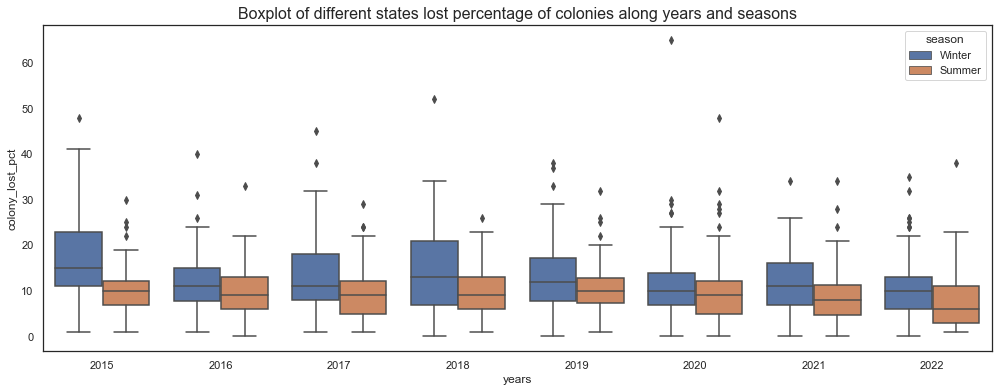

In [54]:
my_colors = ["#9b59b6", "#3498db"]
sns.set_palette(my_colors)
sns.set_theme(style="white")
plt.figure(figsize =(17, 6))
sns.boxplot(x = "year_revisited", y = "colony_lost_pct", data= df.loc[:,["year_revisited", "season", "colony_lost_pct"]], hue="season")
plt.title("Boxplot of different states lost percentage of colonies along years and seasons", fontsize=16)
plt.xlabel("years")
plt.show()

In [60]:
cols_temp = ["year_revisited", "state", "season", "colony_lost"]
df_temp2 = df.loc[:,cols_temp]
df_temp2 = df_temp2[df_temp2.state != "california"]
df_temp2.head() #NO CALIFORNIA

year_revisited        state  season  colony_lost
0            2015      alabama  Winter       1800.0
1            2015      arizona  Winter       4600.0
2            2015     arkansas  Winter       1500.0
4            2015     colorado  Winter       1500.0
5            2015  connecticut  Winter        870.0

In [62]:
np.where(df_temp2.colony_lost > 80000)[0][0]
df_temp2.iloc[118,:] #NORTH DAKOTA PROBLEM

year_revisited            2015
state             north dakota
season                  Summer
colony_lost            93000.0
Name: 121, dtype: object

In [63]:
df_temp2 = df_temp2[df_temp2.state != "north dakota"]

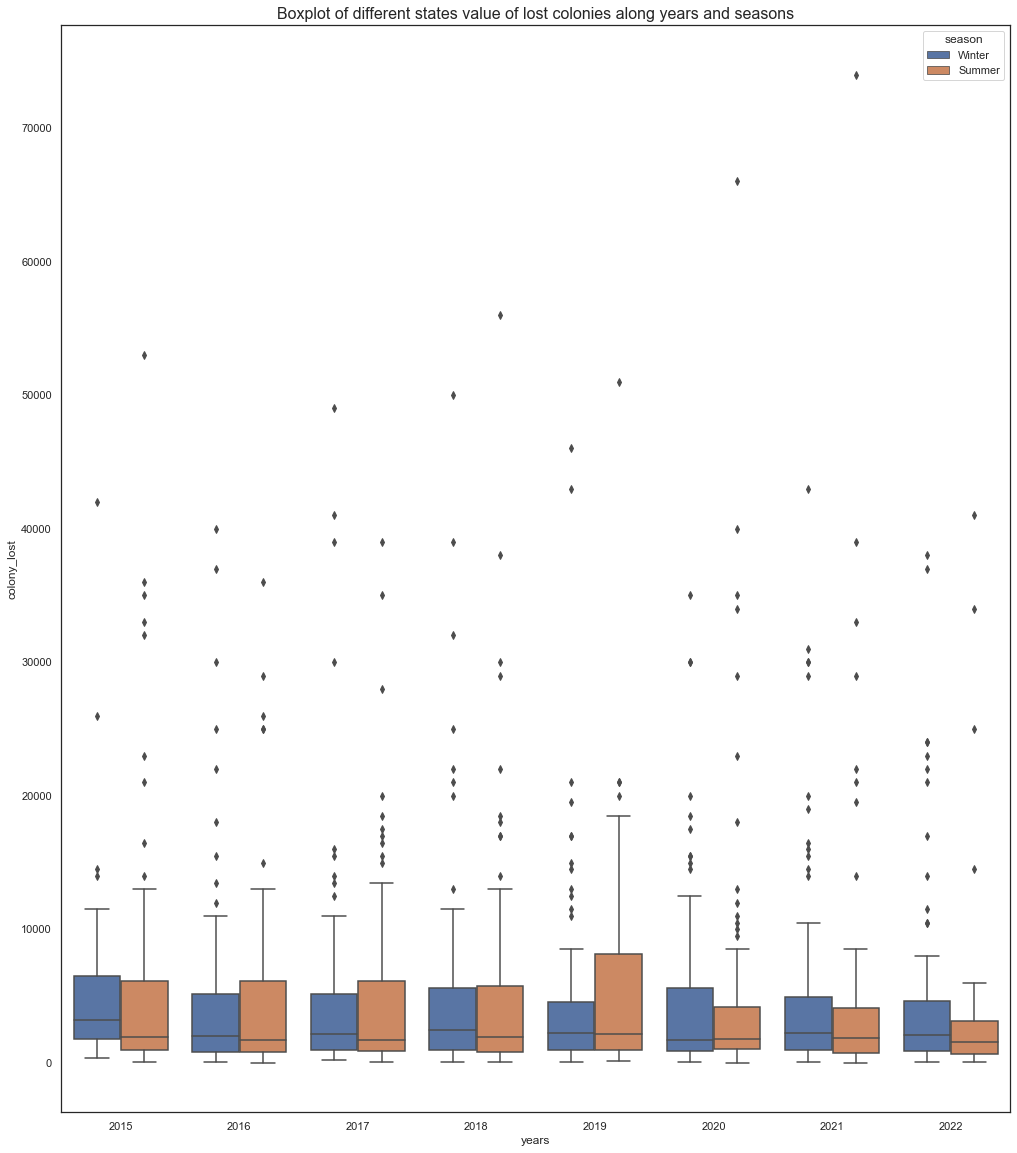

In [66]:
my_colors = ["#9b59b6", "#3498db"]
sns.set_palette(my_colors)
sns.set_theme(style="white")
plt.figure(figsize =(17, 20))
sns.boxplot(x = "year_revisited", y = "colony_lost", data=df_temp2, hue="season") #Without California and North Dakota
plt.title("Boxplot of different states value of lost colonies along years and seasons", fontsize=16)
plt.xlabel("years")
plt.show()

In [88]:
cols_temp = ["year_revisited", "season", "state", "colony_lost_pct"]
df_temp3 = df.loc[:,cols_temp]
df_temp3 = df_temp3.groupby(["year_revisited", "state", "season"]).mean()
#df_temp3.reset_index()
df_temp3.head(200)
#df_temp3.to_csv("df_season.csv")

colony_lost_pct
year_revisited state          season                 
2015           alabama        Summer             14.0
                              Winter             26.0
               arizona        Summer             16.0
                              Winter             13.0
               arkansas       Summer             22.0
                              Winter             11.0
               california     Summer             10.0
                              Winter             15.0
               colorado       Summer             11.5
                              Winter             12.0
               connecticut    Summer              2.0
                              Winter             22.0
               florida        Summer             16.0
                              Winter             13.0
               georgia        Summer             15.5
                              Winter             14.0
               hawaii         Summer             10.0
                              Winter              4.0
               idaho          Summer             10.0
                              Winter              4.0
               illinois       Summer             12.0
                              Winter             40.0
               indiana        Summer             10.5
                              Winter             22.0
               iowa           Summer              7.0
                              Winter             18.0
               kansas         Summer             10.5
                              Winter             23.0
               kentucky       Summer             12.5
                              Winter             39.0
               louisiana      Summer              4.0
                              Winter             16.0
               maine          Summer              9.5
                              Winter              6.0
               maryland       Summer              6.0
                              Winter             41.0
               massachusetts  Summer              5.0
                              Winter             22.0
               michigan       Summer              9.5
                              Winter             19.0
               minnesota      Summer             17.0
                              Winter              5.0
               mississippi    Summer             11.0
                              Winter             11.0
               missouri       Summer              6.5
                              Winter             15.0
               montana        Summer              4.5
                              Winter              6.0
               nebraska       Summer              7.0
                              Winter              8.0
               new jersey     Summer              5.5
                              Winter             12.0
               new mexico     Summer             18.5
                              Winter             10.0
               new york       Summer              8.5
                              Winter             22.0
               north carolina Summer             10.0
                              Winter             27.0
               north dakota   Summer             12.5
                              Winter              1.0
               ohio           Summer              9.5
                              Winter             48.0
               oklahoma       Summer              4.5
                              Winter             23.0
               oregon         Summer              7.5
                              Winter              8.0
               other states   Summer             12.0
                              Winter             23.0
               pennsylvania   Summer              7.5
                              Winter             31.0
               south carolina Summer             11.0
                              Winter             15.0
               south dakota   Summer      

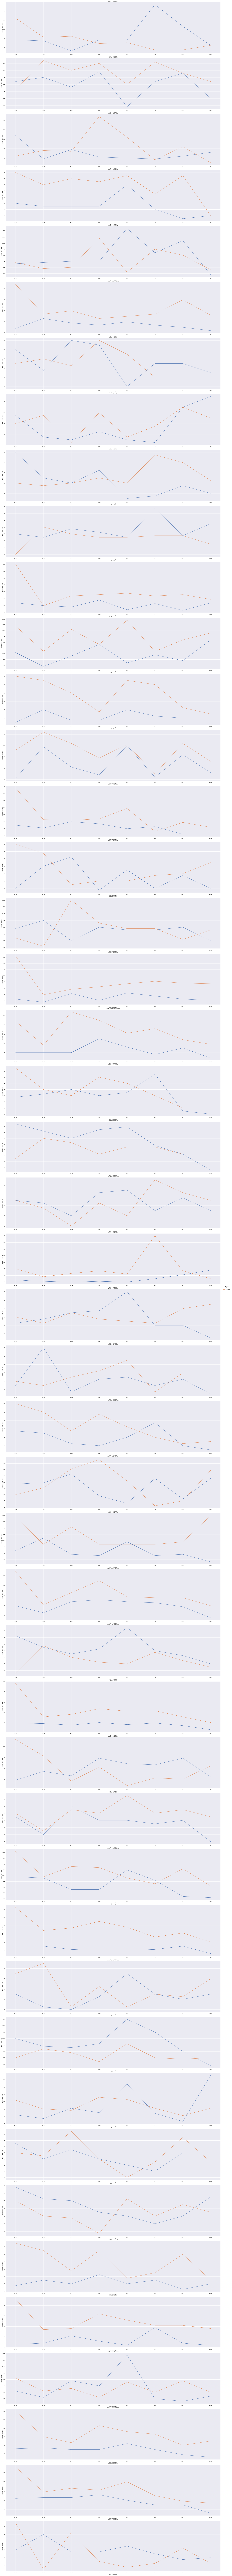

In [68]:
sns.set_theme()

sns.relplot(data = df_temp3, kind ='line', x ="year_revisited", y ="colony_lost_pct", row ="state", hue = "season",
            legend = True, facet_kws=dict(sharex=False, sharey=False), height = 7, aspect=4)
#height: altezza each subplot
#height*aspect = larghezza each subplot

plt.show()

In [35]:
df_US.head()

year months   colony_n  colony_max  colony_lost  colony_lost_pct  \
46   2015     Q1  2824610.0         NaN     500020.0             18.0   
93   2015     Q2  2849500.0         NaN     352860.0             12.0   
140  2015     Q3  3132880.0         NaN     457100.0             15.0   
187  2015     Q4  2874760.0         NaN     412380.0             14.0   
234  2016     Q1  2594590.0         NaN     428800.0             17.0   

     colony_added  colony_reno  colony_reno_pct  Disesases  Other  \
46       546980.0     270530.0             10.0        3.1    6.9   
93       661860.0     692850.0             24.0        4.9   11.6   
140      172990.0     303070.0             10.0        8.0    8.8   
187      117150.0     158790.0              6.0        5.2    7.3   
234      378160.0     158050.0              6.0        6.2    7.0   

     Other pests/parasites  Pesticides  Unknown  Varroa mites  
46                     8.6         7.4      4.3          25.2  
93                    19.5        16.6      3.5          43.4  
140                   17.6        15.2      4.8          41.2  
187                   11.4         9.5      6.9          37.0  
234                   12.6        10.5      5.4          34.3

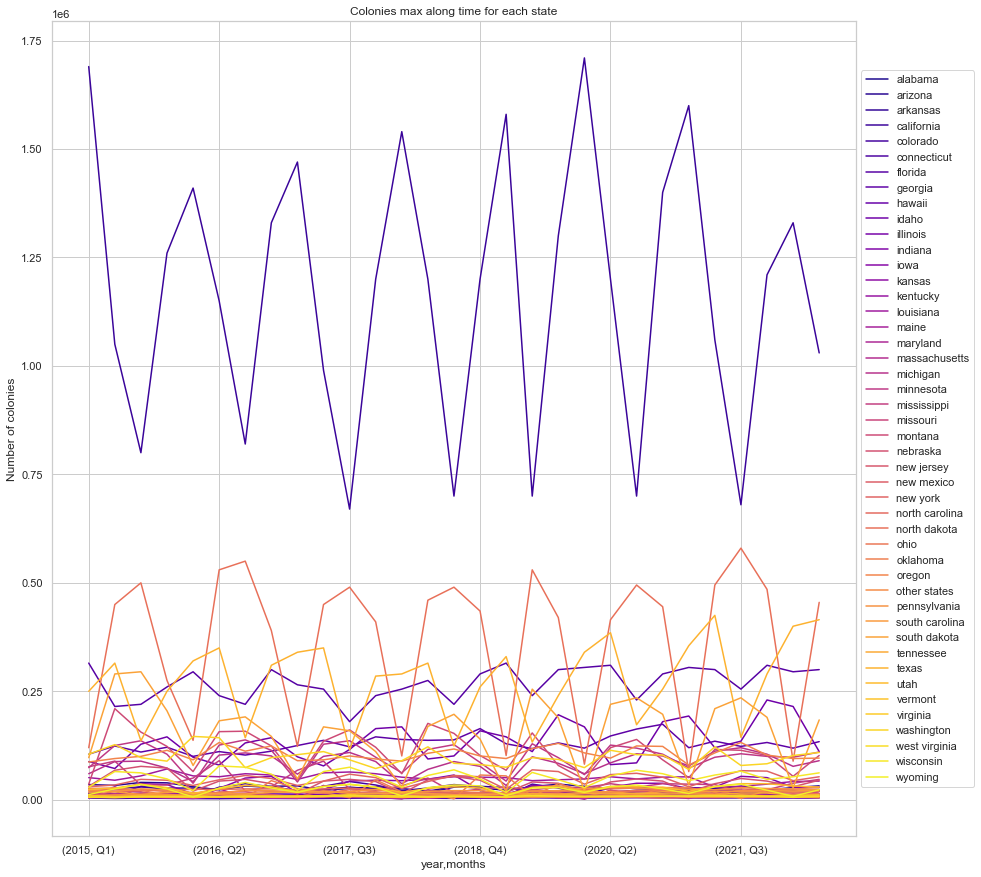

In [74]:
fig, ax = plt.subplots(figsize=(16,15))
plt.title('Colonies max along time for each state')
plt.ylabel('Number of colonies')
df_years["colony_max"].unstack().plot(ax=ax,color=custom_states)

# Shrink current axis by 10%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [90]:
df_years = df.groupby(["year", "months", "state", "season"]).sum()
df_years.head()


colony_n  colony_max  colony_lost  \
year months state      season                                       
2015 Q1     alabama    Winter     7000.0      7000.0       1800.0   
            arizona    Winter    35000.0     35000.0       4600.0   
            arkansas   Winter    13000.0     14000.0       1500.0   
            california Winter  1440000.0   1690000.0     255000.0   
            colorado   Winter     3500.0     12500.0       1500.0   

                               colony_lost_pct  colony_added  colony_reno  \
year months state      season                                               
2015 Q1     alabama    Winter               26          2800        250.0   
            arizona    Winter               13          3400       2100.0   
            arkansas   Winter               11          1200         90.0   
            california Winter               15        250000     124000.0   
            colorado   Winter               12           200        140.0   

                               colony_reno_pct  Varroa.mites  \
year months state      season                                  
2015 Q1     alabama    Winter                4          10.0   
            arizona    Winter                6          26.9   
            arkansas   Winter                1          17.6   
            california Winter                7          24.7   
            colorado   Winter                1          14.6   

                               Other.pests.parasites  Disesases  Pesticides  \
year months state      season                                                 
2015 Q1     alabama    Winter                    5.4        0.0         2.2   
            arizona    Winter                   20.5        0.1         0.0   
            arkansas   Winter                   11.4        1.5         3.4   
            california Winter                    7.2        3.0         7.5   
            colorado   Winter                    0.9        1.8         0.6   

                               Other  Unknown  year_revisited  
year months state      season                                  
2015 Q1     alabama    Winter    9.1      9.4            2015  
            arizona    Winter    1.8      3.1            2015  
            arkansas   Winter    1.0      1.0            2015  
            california Winter    6.5      2.8            2015  
            colorado   Winter    2.6      5.9            2015

In [99]:
years = df_years.index.get_level_values(0)
months = df_years.index.get_level_values(1)
indices = list(zip(years, months))
indices

[(2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q1'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q2'),
 (2015, 'Q

TypeError: Invalid object type at position 0

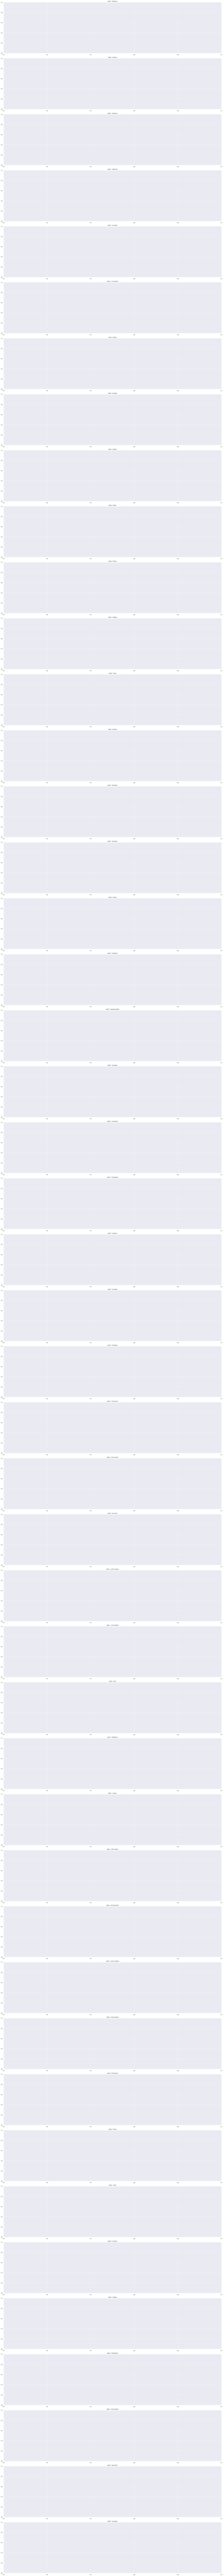

In [100]:
sns.set_theme()

sns.relplot(data = df_years, kind ='line', x = indices, y ="colony_lost_pct", row ="state", hue = "season",
            legend = True, facet_kws=dict(sharex=False, sharey=False), height = 7, aspect=4)
#height: altezza each subplot
#height*aspect = larghezza each subplot

plt.show()

# Geospatial Representation

In [ ]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pathlib
import mapclassify as mc

In [ ]:
pip install pysal

In [ ]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

### Survival

In [104]:
df.head()

year months       state   colony_n  colony_max  colony_lost  \
0  2015     Q1     alabama     7000.0      7000.0       1800.0   
1  2015     Q1     arizona    35000.0     35000.0       4600.0   
2  2015     Q1    arkansas    13000.0     14000.0       1500.0   
3  2015     Q1  california  1440000.0   1690000.0     255000.0   
4  2015     Q1    colorado     3500.0     12500.0       1500.0   

   colony_lost_pct  colony_added  colony_reno  colony_reno_pct  Varroa.mites  \
0               26          2800        250.0                4          10.0   
1               13          3400       2100.0                6          26.9   
2               11          1200         90.0                1          17.6   
3               15        250000     124000.0                7          24.7   
4               12           200        140.0                1          14.6   

   Other.pests.parasites  Disesases  Pesticides  Other  Unknown  season  \
0                    5.4        0.0         2.2    9.1      9.4  Winter   
1                   20.5        0.1         0.0    1.8      3.1  Winter   
2                   11.4        1.5         3.4    1.0      1.0  Winter   
3                    7.2        3.0         7.5    6.5      2.8  Winter   
4                    0.9        1.8         0.6    2.6      5.9  Winter   

   year_revisited  
0            2015  
1            2015  
2            2015  
3            2015  
4            2015

In [111]:
df_states = df.groupby(["state", "year", "months"]).sum()
df_states["colony_end_computed"] = df_states.colony_n + df_states.colony_added - df_states.colony_lost #o colony_max ??
df_states.head()

colony_n  colony_max  colony_lost  colony_lost_pct  \
state   year months                                                       
alabama 2015 Q1        7000.0      7000.0       1800.0               26   
             Q2        7500.0      7500.0        860.0               12   
             Q3        8500.0      9000.0       1400.0               16   
             Q4        8000.0      8000.0        610.0                8   
        2016 Q1        7500.0      7500.0       1700.0               23   

                     colony_added  colony_reno  colony_reno_pct  Varroa.mites  \
state   year months                                                             
alabama 2015 Q1              2800        250.0                4          10.0   
             Q2              1900        680.0                9          16.7   
             Q3               160        260.0                3          63.1   
             Q4                80         60.0                1           3.1   
        2016 Q1              2100         90.0                1          24.2   

                     Other.pests.parasites  Disesases  Pesticides  Other  \
state   year months                                                        
alabama 2015 Q1                        5.4        0.0         2.2    9.1   
             Q2                       42.5        0.0         2.3    3.2   
             Q3                       70.6        0.0         2.6    2.2   
             Q4                        6.4        0.2         0.2    2.8   
        2016 Q1                       22.0        4.3         8.1    2.4   

                     Unknown  year_revisited  colony_end_computed  
state   year months                                                
alabama 2015 Q1          9.4            2015               8000.0  
             Q2          4.1            2015               8540.0  
             Q3         17.7            2015               7260.0  
             Q4          1.9            2016               7470.0  
        2016 Q1         11.3            2016               7900.0

In [112]:
df_states2 = df_states[["colony_n", "colony_end_computed"]]
df_states2.head()

colony_n  colony_end_computed
state   year months                               
alabama 2015 Q1        7000.0               8000.0
             Q2        7500.0               8540.0
             Q3        8500.0               7260.0
             Q4        8000.0               7470.0
        2016 Q1        7500.0               7900.0

In [113]:
df_states2["percentage end colonies"] = (df_states2.colony_end_computed - df_states2.colony_n)/df_states2.colony_n
df_states2.head()

colony_n  colony_end_computed  percentage end colonies
state   year months                                                        
alabama 2015 Q1        7000.0               8000.0                 0.142857
             Q2        7500.0               8540.0                 0.138667
             Q3        8500.0               7260.0                -0.145882
             Q4        8000.0               7470.0                -0.066250
        2016 Q1        7500.0               7900.0                 0.053333

In [114]:
df_states2['cumulative percentage'] = df_states2.groupby(['state'])['percentage end colonies'].transform('cumsum')

In [115]:
df_states2.head(100)

colony_n  colony_end_computed  \
state      year months                                   
alabama    2015 Q1         7000.0               8000.0   
                Q2         7500.0               8540.0   
                Q3         8500.0               7260.0   
                Q4         8000.0               7470.0   
           2016 Q1         7500.0               7900.0   
                Q2         8000.0               8270.0   
                Q3         8000.0               7240.0   
                Q4         7000.0               6440.0   
           2017 Q1         7000.0               5970.0   
                Q2         6500.0               7260.0   
                Q3         7000.0               6790.0   
                Q4         7500.0               7060.0   
           2018 Q1         7500.0               7880.0   
                Q2         7000.0               8050.0   
                Q3         8500.0               8400.0   
                Q4         6500.0               5880.0   
           2019 Q1         5500.0               5650.0   
                Q3         7000.0               6170.0   
                Q4         6000.0               5580.0   
           2020 Q1         5500.0               6990.0   
                Q2         8500.0               9100.0   
                Q3         9000.0               7100.0   
                Q4        17000.0              16650.0   
           2021 Q1        10000.0               9570.0   
                Q2         9500.0              10200.0   
                Q3         9500.0               9050.0   
                Q4         9000.0               8260.0   
           2022 Q1         8000.0               8500.0   
                Q2        12000.0              15300.0   
arizona    2015 Q1        35000.0              33800.0   
                Q2        33000.0              47000.0   
                Q3        40000.0              38300.0   
                Q4        36000.0              27000.0   
           2016 Q1        30000.0              28800.0   
                Q2        22000.0              32300.0   
                Q3        30000.0              27200.0   
                Q4        29000.0              27100.0   
           2017 Q1        31000.0              27900.0   
                Q2        22000.0              31900.0   
                Q3        26000.0              26900.0   
                Q4        27000.0              21800.0   
           2018 Q1        25000.0              19810.0   
                Q2        19000.0              30400.0   
                Q3        31000.0              26200.0   
                Q4        26000.0              23200.0   
           2019 Q1        22000.0              19930.0   
                Q3        26000.0              29500.0   
                Q4        34000.0              27300.0   
           2020 Q1        29000.0              23500.0   
                Q2        26000.0              39200.0   
                Q3        28000.0              22600.0   
                Q4        25000.0              26500.0   
           2021 Q1        28000.0              26000.0   
                Q2        26000.0              33700.0   
                Q3        31000.0              26500.0   
                Q4        23000.0              25000.0   
           2022 Q1        25000.0              27400.0   
                Q2        31000.0              45400.0   
arkansas   2015 Q1        13000.0              12700.0   
                Q2        13500.0              23100.0   
                Q3        23000.0              14500.0   
                Q4        23000.0              22500.0   
           2016 Q1        27000.0              27000.0   
                Q2        24000.0              32600.0   
                Q3        32000.0              30770.0   
                Q4        28000.0              25520.0   
           2017 Q1        18000.0              14930.0   
                Q2     

In [117]:
df_states2[df_states2["cumulative percentage"] < -0.10]

colony_n  colony_end_computed  \
state          year months                                   
alabama        2017 Q1         7000.0               5970.0   
                    Q4         7500.0               7060.0   
               2019 Q3         7000.0               6170.0   
                    Q4         6000.0               5580.0   
               2021 Q1        10000.0               9570.0   
                    Q3         9500.0               9050.0   
                    Q4         9000.0               8260.0   
               2022 Q1         8000.0               8500.0   
california     2015 Q4       750000.0             640000.0   
               2016 Q1      1130000.0            1140000.0   
                    Q4       770000.0             605000.0   
               2017 Q1      1170000.0            1112000.0   
                    Q2       980000.0            1050000.0   
                    Q3       590000.0             596000.0   
                    Q4       680000.0             615000.0   
               2018 Q1      1150000.0            1140000.0   
                    Q2      1130000.0            1192000.0   
                    Q3       590000.0             580000.0   
                    Q4       680000.0             596000.0   
               2019 Q1      1140000.0             988000.0   
                    Q3       650000.0             644000.0   
                    Q4       700000.0             724000.0   
               2020 Q1      1350000.0            1360000.0   
                    Q2      1200000.0            1275000.0   
                    Q3       640000.0             632000.0   
                    Q4       700000.0             656000.0   
               2021 Q1      1180000.0            1094000.0   
                    Q2      1090000.0            1141000.0   
                    Q3       650000.0             672000.0   
                    Q4       640000.0             605000.0   
               2022 Q1      1020000.0             996000.0   
                    Q2       980000.0            1052000.0   
colorado       2015 Q1         3500.0               2200.0   
                    Q3        29000.0              25900.0   
connecticut    2015 Q1         3900.0               3320.0   
idaho          2016 Q1        91000.0              88000.0   
                    Q4       121000.0             110500.0   
               2017 Q1        95000.0              88500.0   
               2018 Q1       164000.0             144500.0   
               2019 Q1       132000.0             124100.0   
                    Q3        95000.0              93000.0   
                    Q4       111000.0              97300.0   
               2020 Q1       156000.0             141900.0   
                    Q2        48000.0              52000.0   
                    Q3        70000.0              77500.0   
                    Q4        94000.0              83000.0   
               2021 Q1       167000.0             163500.0   
                    Q4       141000.0             119250.0   
               2022 Q1       194000.0             193500.0   
illinois       2015 Q1         6000.0               4100.0   
indiana        2015 Q1         9000.0               7390.0   
iowa           2015 Q1        12500.0              11100.0   
               2016 Q1        13000.0              10190.0   
kansas         2015 Q1         4600.0               3450.0   
                    Q4         8500.0               5150.0   
               2016 Q1         5000.0               5300.0   
                    Q3         8000.0               5710.0   
                    Q4         5000.0               3900.0   
               2017 Q1         3800.0               3730.0   
               2018 Q1         3700.0               3120.0   
               2019 Q4         4800.0               4340.0   
               2021 Q1         5000.0               4600.0   
                    Q4         8000.0               6040.0   